<a href="https://colab.research.google.com/github/priyadarshi0007/Machine-Learning-Algo-Revison/blob/master/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

print("Libaries has been imported successfully")

Libaries has been imported successfully


In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.expand_frame_repr', False)
rcParams['figure.figsize'] = 16, 8

print("Options has been set")

Options has been set


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/bhattbhavesh91/simple-linear-regression-tensorflow2.0/master/data.csv')

In [5]:
df.head(2)

,X,y
0,230.1,22.1
1,44.5,10.4


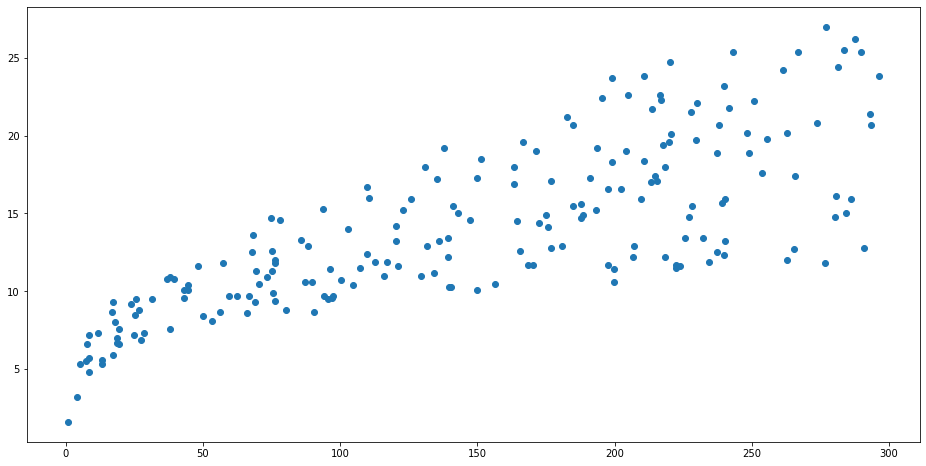

In [9]:
plt.scatter(df['X'],df['y'])
plt.show()

In [12]:
df.shape

(200, 2)

In [13]:
df.describe()

,X,y
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


Our next step is to divide the data into “attributes” and “labels”.
Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have two columns. 

In [14]:
x = df['X'].values.reshape(-1,1)
target = df['y'].values.reshape(-1,1)

In [18]:
print(x.shape)
print(target.shape)

(200, 1)
(200, 1)


In [19]:
x_train,x_test,target_train,target_test = train_test_split(x,target,test_size =0.2,random_state= 19)

In [22]:
print(x_train.shape)
print(x_test.shape)

(160, 1)
(40, 1)


In [24]:
print(target_train.shape)
print(target_test.shape)

(160, 1)
(40, 1)


In [26]:
#Traing the Algorithm
regressor = LinearRegression()
regressor.fit(x_train,target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print(regressor.intercept_)
print(regressor.coef_)

[7.14464039]
[[0.04676161]]


In [28]:
pred = regressor.predict(x_test)

In [34]:
df_actual_predicted = pd.DataFrame({'Actual': target_test.flatten(),'Predicted': pred.flatten()})

# we use flatten because we need to collapse the array values into one dimension or we will get "If using all scalar values, you must pass an index"

In [35]:
df_actual_predicted.head(10)

,Actual,Predicted
0,16.6,16.613867
1,10.9,10.576943
2,17.4,19.564525
3,7.3,8.482023
4,9.7,11.703898
5,11.5,12.166838
6,10.9,8.921582
7,18.0,17.357377
8,9.7,11.549584
9,18.0,14.790164


#Mean Absolute Error
(MAE) is the mean of the absolute value of the errors

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test,pred))

Mean Absolute Error: 2.3664937251005442


#Mean Squared Error 
(MSE) is the mean of the squared errors and is calculated as:

In [49]:
print('Mean Squared Error:', metrics.mean_squared_error(target_test,pred))  

Mean Squared Error: 8.48686595045249


#Root Mean Squared Error 
(RMSE) is the square root of the mean of the squared errors:

In [50]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test,pred)))

Root Mean Squared Error: 2.913222605715617


In [54]:
print('R Squared Error:', (metrics.r2_score(target_test,pred)))

R Squared Error: 0.6961841520963856


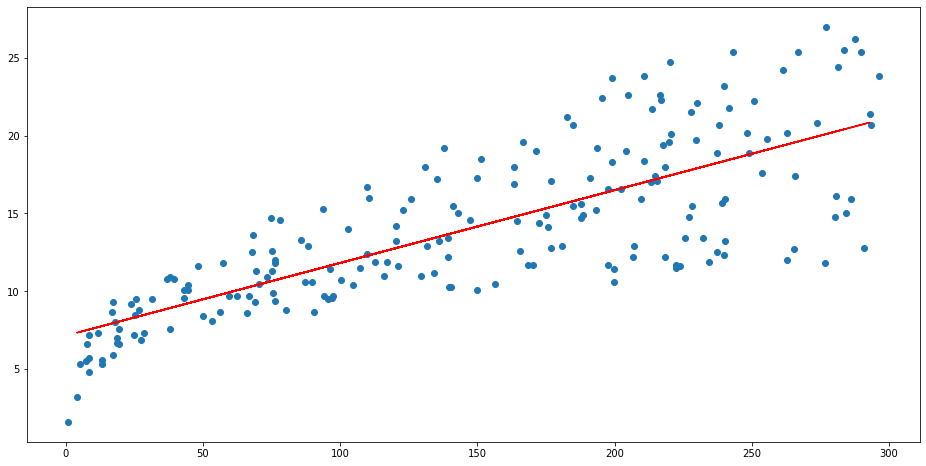

In [43]:
#Lets See the Best Fit Line
plt.scatter(df['X'], df['y'])
plt.plot(x_test,pred, color='red')
plt.show()